### **<u>WEATHER STATIONS & TEMPERATURE SUMMARY ANALYSIS NEAR ANN ARBOR</u>    *(TASKS 3 & 4)***

The complete code block below analyzes weather station data and plots a temperature summary for 2015 near Ann Arbor, Michigan. It uses two datasets: one for stations locations and one for temperature data.

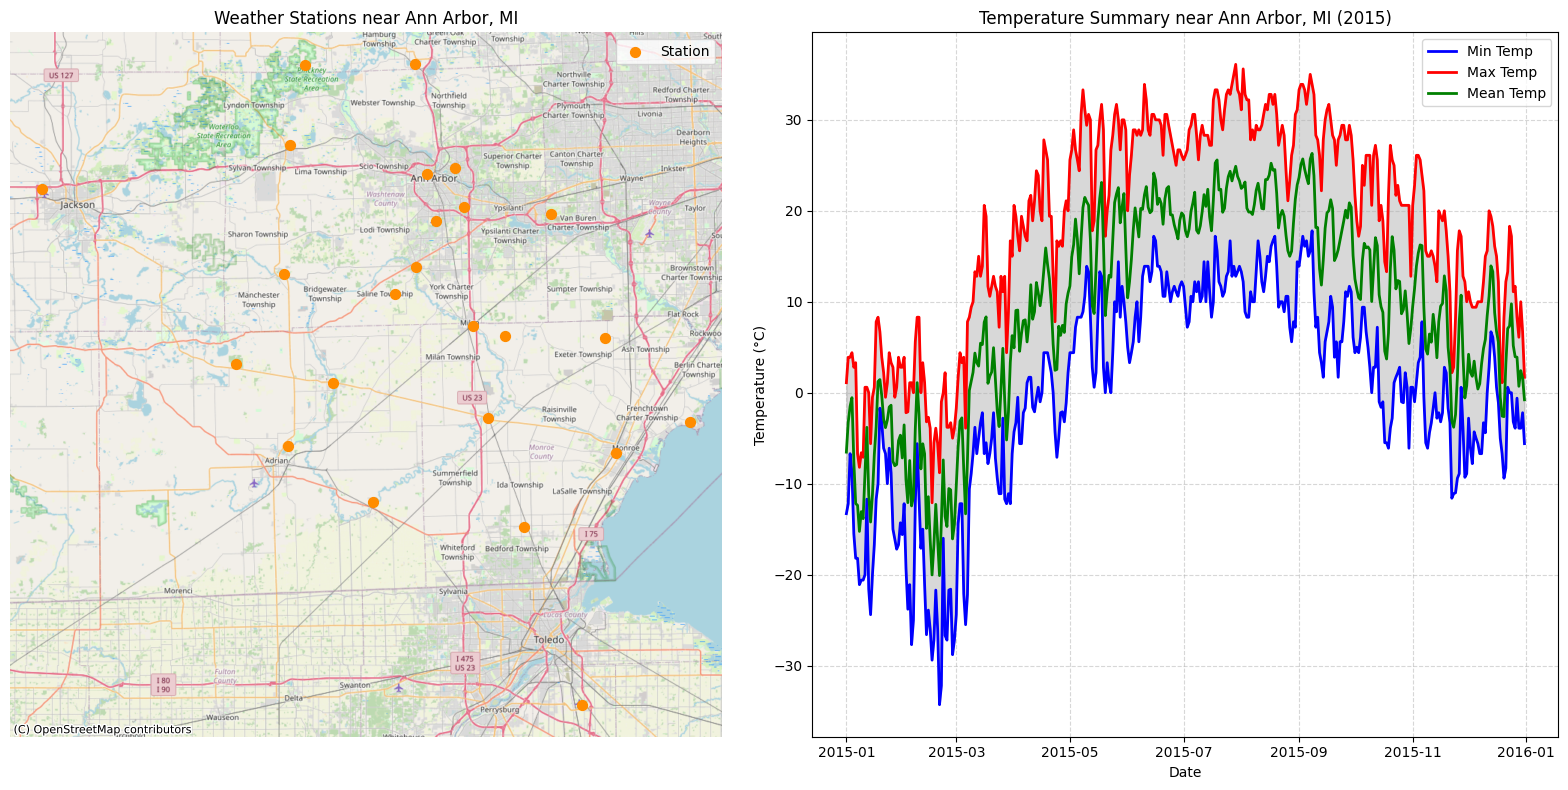

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import os

# ----------------------------
# Part 1: Load Stations Dataset
# ----------------------------

# Automatically use the file named "W-Stations_Cleaned.tsv" in the script's directory
stations_path = os.path.join(os.getcwd(), 'W-Stations_Cleaned.tsv')

# Validate the file path
if not os.path.exists(stations_path) or not stations_path:
    raise FileNotFoundError("The provided Stations file path is invalid or empty.")

# Load the stations dataset
stations_df = pd.read_csv(stations_path, sep='\t')

# Convert the stations DataFrame to a GeoDataFrame (for mapping)
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Create a geometry column from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(stations_df['LONGITUDE'], stations_df['LATITUDE'])]
nearby_stations = GeoDataFrame(stations_df, geometry=geometry, crs="EPSG:4326")  # WGS84

# Reproject to EPSG:3857 (Web Mercator) for compatibility with Contextily
nearby_stations = nearby_stations.to_crs(epsg=3857)

# ----------------------------
# Part 2: Plot Stations on a Map with Basemap
# ----------------------------

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the nearby stations on the left subplot
nearby_stations.plot(ax=ax[0], marker='o', color='darkorange', markersize=50, label="Station")
ax[0].set_title("Weather Stations near Ann Arbor, MI")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].legend()

# Add basemap using Contextily with OpenStreetMap Mapnik
ctx.add_basemap(ax[0], source=ctx.providers.OpenStreetMap.Mapnik)

# Optionally, remove axis labels for a cleaner map view
ax[0].set_axis_off()

# ----------------------------
# Part 3: Load Temperature Dataset and Filter for 2015
# ----------------------------

# Automatically use the file named "Temp_Cleaned.tsv" in the script's directory
temp_path = os.path.join(os.getcwd(), 'Temp_Cleaned.tsv')

# Validate the file path
if not os.path.exists(temp_path) or not temp_path:
    raise FileNotFoundError("The provided Temperature file path is invalid or empty.")

# Load the temperature dataset
temp_data = pd.read_csv(temp_path, sep='\t')

# Convert 'Date' column to datetime
temp_data['Date'] = pd.to_datetime(temp_data['Date'])

# Filter temperature data for 2015
temp_2015 = temp_data[temp_data['Date'].dt.year == 2015].copy()

# Filter temperature data for the nearby stations
nearby_ids = nearby_stations['ID'].unique()
temp_2015_near = temp_2015[temp_2015['ID'].isin(nearby_ids)].copy()

# Group by Date and compute summary statistics (min, max, mean)
temp_summary = temp_2015_near.groupby('Date')['Temperature(°C)'].agg(['min', 'max', 'mean'])

# ----------------------------
# Part 4: Plot Temperature Summary for 2015
# ----------------------------

# Plot the temperature summary on the right subplot
ax[1].plot(temp_summary.index, temp_summary['min'], label='Min Temp', color='blue', linewidth=2)
ax[1].plot(temp_summary.index, temp_summary['max'], label='Max Temp', color='red', linewidth=2)
ax[1].plot(temp_summary.index, temp_summary['mean'], label='Mean Temp', color='green', linewidth=2)
ax[1].fill_between(temp_summary.index, temp_summary['min'], temp_summary['max'], color='grey', alpha=0.3)

# Format the temperature summary plot
ax[1].set_title("Temperature Summary near Ann Arbor, MI (2015)")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temperature (°C)")
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**1. Co-ordinates Conversion**

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(lon, lat) for lon, lat in zip(stations_df['LONGITUDE'], stations_df['LATITUDE'])]
nearby_stations = GeoDataFrame(stations_df, geometry=geometry, crs="EPSG:4326")
nearby_stations = nearby_stations.to_crs(epsg=3857)

*Converts the DataFrame into a GeoDataFrame for mapping purposes.*

**2. Plot Stations on a Map with Basemap**

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

nearby_stations.plot(ax=ax[0], marker='o', color='darkorange', markersize=50, label="Station")
ax[0].set_title("Weather Stations near Ann Arbor, MI")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].legend()

ctx.add_basemap(ax[0], source=ctx.providers.OpenStreetMap.Mapnik)
ax[0].set_axis_off()

*Creates a figure with two subplots and plots the weather stations on the left subplot using Contextily to add a basemap.*

**3. Filter for 2015**

In [ ]:
temp_data = pd.read_csv(temp_path, sep='\t')
temp_data['Date'] = pd.to_datetime(temp_data['Date'])

temp_2015 = temp_data[temp_data['Date'].dt.year == 2015].copy()
nearby_ids = nearby_stations['ID'].unique()
temp_2015_near = temp_2015[temp_2015['ID'].isin(nearby_ids)].copy()
temp_summary = temp_2015_near.groupby('Date')['Temperature(°C)'].agg(['min', 'max', 'mean'])

*Prompts for the temperature dataset file, validates and loads the data, converts the 'Date' column, filters the data for 2015, restricts it to the nearby stations, and computes daily summary statistics (minimum, maximum, and mean temperatures).*

**4. Plot Temperature Summary for 2015**

In [ ]:
ax[1].plot(temp_summary.index, temp_summary['min'], label='Min Temp', color='blue', linewidth=2)
ax[1].plot(temp_summary.index, temp_summary['max'], label='Max Temp', color='red', linewidth=2)
ax[1].plot(temp_summary.index, temp_summary['mean'], label='Mean Temp', color='green', linewidth=2)
ax[1].fill_between(temp_summary.index, temp_summary['min'], temp_summary['max'], color='grey', alpha=0.3)

ax[1].set_title("Temperature Summary near Ann Arbor, MI (2015)")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temperature (°C)")
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

*Plots the temperature summary (min, max, and mean temperatures) on the right subplot, formats the plot with titles, labels, legends, and grid lines, and then displays the final visualization.*

#### ***Analysis***

**Weather Station Distribution and Temperature Summary for 2015**:


- ***Locations of Weather stations:*** Weather stations are located across diverse terrains, ensuring comprehensive data collection.High-density station clusters near urban centers enhance climate monitoring..

- ***Seasonal changes:*** Seasonal temperature trends align with historical patterns but show increased variability.

- ***Winter***: Harsh lows with frequent cold spells.
- ***Summer***: New heat records with rising peak temperatures.
- ***Spring/Autumn***: Noticeable fluctuations during seasonal transitions..

